In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
crime = "NEIGHBORHOOD_CRIME_STATS.csv"
crime_df = pd.read_csv(crime, encoding="ISO-8859-1")
len(crime_df)

16192

In [3]:
crime_df['Date'] = ''
crime_df.head()
crime_df[["reportYear", "reportMonth"]] = crime_df[["reportYear", "reportMonth"]].apply(pd.to_numeric)

In [5]:
for i, row in crime_df.iterrows():
    if row["reportYear"] == 2017:
        crime_df.loc[i,"Date"]="before"
    elif (row["reportMonth"] < 8) and (row["reportYear"] == 2018):
        crime_df.loc[i, "Date"] = "before"
    else:
        crime_df.loc[i, "Date"] = "after"

date_crime_df = crime_df

/Users/chrismiller/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


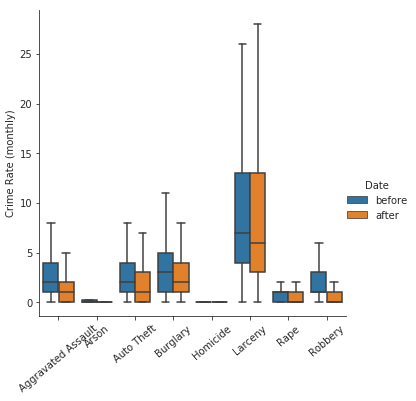

In [6]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("ucrDescription", "number", "Date", data=date_crime_df, kind="box", showfliers=False)
    g.set_axis_labels("", "Crime Rate (monthly)"); 
    g.set_xticklabels(rotation=40)

In [7]:
#lock rows for only the months the pilot took place, for year prior and year of, and add "before"
# or "after" in date column, unless occurred outside then add "other"
for i, row in crime_df.iterrows():
    if (row["reportMonth"] == 8) and (row["reportYear"] == 2017):
        date_crime_df.loc[i,"Date"]= "before"
    elif (row["reportMonth"] == 9) and (row["reportYear"] == 2017):
        date_crime_df.loc[i,"Date"]= "before"    
    elif (row["reportMonth"] == 10) and (row["reportYear"] == 2017):
        date_crime_df.loc[i,"Date"]= "before"
    elif (row["reportMonth"] == 11) and (row["reportYear"] == 2017):
        date_crime_df.loc[i,"Date"]= "before"
    elif (row["reportMonth"] == 8) and (row["reportYear"] == 2018):
        date_crime_df.loc[i, "Date"] = "during"
    elif (row["reportMonth"] == 9) and (row["reportYear"] == 2018):
        date_crime_df.loc[i, "Date"] = "during"
    elif (row["reportMonth"] == 10) and (row["reportYear"] == 2018):
        date_crime_df.loc[i, "Date"] = "during"
    elif (row["reportMonth"] == 11) and (row["reportYear"] == 2018):
        date_crime_df.loc[i, "Date"] = "during"

    else:
        date_crime_df.loc[i, "Date"] = "NaN"

new_date_crime_df = date_crime_df

/Users/chrismiller/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


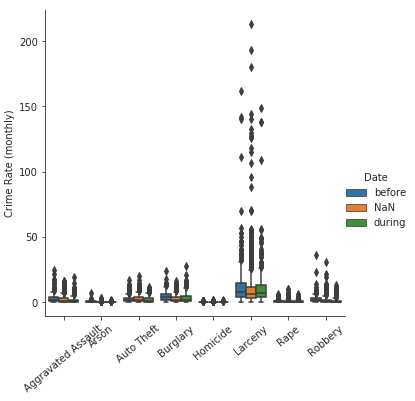

In [8]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("ucrDescription", "number", "Date", data=new_date_crime_df, kind="box")# showfliers=False)
    g.set_axis_labels("", "Crime Rate (monthly)"); 
    g.set_xticklabels(rotation=40)

In [9]:
columns = ['Date']
pilot_crime_df = new_date_crime_df.replace("NaN", pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0).astype(str)
pilot_crime_df.loc[:, "number"] = pilot_crime_df["number"].astype("float")
len(pilot_crime_df)

5632

/Users/chrismiller/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


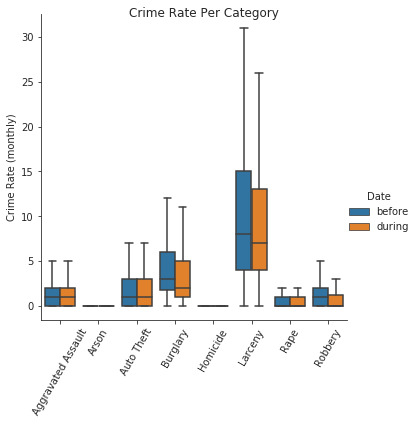

In [10]:
#graph the data that is only 8-12,2017 and 8-12, 2018, don't show outliers
with sns.axes_style(style='ticks'):
    g = sns.factorplot("ucrDescription", "number", "Date", data=pilot_crime_df, kind="box", showfliers=False)
    g.set_axis_labels("", "Crime Rate (monthly)"); 
    g.set_xticklabels(rotation=60)
    g.fig.suptitle('Crime Rate Per Category')
g.savefig("Crimebeforeafterplot.png")

In [11]:
from scipy.stats import sem, ttest_ind
from scipy import stats
plist = []

In [12]:
Agg_groupby = pilot_crime_df.loc[pilot_crime_df["ucrDescription"] == "Aggravated Assault", :]
Agg_groupby.head()


,OBJECTID,neighborhood,ucrDescription,number,reportMonth,reportYear,Date
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,8,2017,before
8,9,ARMATAGE,Aggravated Assault,0.0,8,2017,before
16,17,AUDUBON PARK,Aggravated Assault,0.0,8,2017,before
24,25,BANCROFT,Aggravated Assault,1.0,8,2017,before
32,33,BELTRAMI,Aggravated Assault,1.0,8,2017,before


In [13]:
Agg_groupby.loc[:, ["number", "reportMonth", "reportYear", "Date"]].head()

,number,reportMonth,reportYear,Date
0,2.0,8,2017,before
8,0.0,8,2017,before
16,0.0,8,2017,before
24,1.0,8,2017,before
32,1.0,8,2017,before


In [14]:
before_Agg_df = Agg_groupby.loc[(Agg_groupby["Date"] == "before")]
during_Agg_df = Agg_groupby.loc[(Agg_groupby["Date"] == "during")]
clean_before_Agg_df = before_Agg_df.dropna()
clean_during_Agg_df = during_Agg_df.dropna()
Agg_Before = clean_before_Agg_df["number"].tolist()
Agg_During = clean_during_Agg_df["number"].tolist()

In [15]:
before_Agg_means = np.mean(Agg_Before)
before_Agg_sem = sem(Agg_Before)
during_Agg_means = np.mean(Agg_During)
during_Agg_sem = sem(Agg_During)

Agg_means = [before_Agg_means, during_Agg_means]
Agg_sems = [before_Agg_sem, during_Agg_sem]
labels = ["Before pilot", "During pilot"]

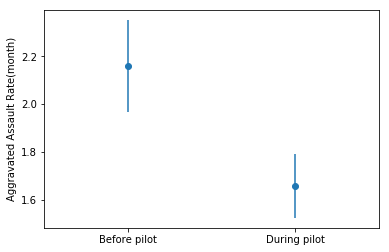

In [17]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(Agg_means)), Agg_means, yerr=Agg_sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Aggravated Assault Rate(month)")

plt.show()

In [19]:
# t-test
(t_stat, p) = stats.ttest_ind(Agg_Before, Agg_During, equal_var=False)
print(p)
plist.append(p)
if p < 0.05:
    print("The differences in Aggravated Assault rates are significant.")
else:
    print("The differences in Aggravated Assault rates are due to chance.")

0.03143613569766119
The differences in Aggravated Assault rates are significant.


In [20]:
Arson_groupby = pilot_crime_df.loc[pilot_crime_df["ucrDescription"] == "Arson", :]
Arson_groupby.head()
Arson_groupby.loc[:, ["number", "reportMonth", "reportYear", "Date"]].head()

,number,reportMonth,reportYear,Date
1,0.0,8,2017,before
9,0.0,8,2017,before
17,1.0,8,2017,before
25,0.0,8,2017,before
33,0.0,8,2017,before


In [21]:
before_Arson_df = Arson_groupby.loc[(Arson_groupby["Date"] == "before")]
during_Arson_df = Arson_groupby.loc[(Arson_groupby["Date"] == "during")]
clean_before_Arson_df = before_Arson_df.dropna()
clean_during_Arson_df = during_Arson_df.dropna()
Arson_Before = clean_before_Arson_df["number"].tolist()
Arson_During = clean_during_Arson_df["number"].tolist()

In [22]:
before_Arson_means = np.mean(Arson_Before)
before_Arson_sem = sem(Arson_Before)
during_Arson_means = np.mean(Arson_During)
during_Arson_sem = sem(Arson_During)

Arson_means = [before_Arson_means, during_Arson_means]
Arson_sems = [before_Arson_sem, during_Arson_sem]
labels = ["Before pilot", "During pilot"]

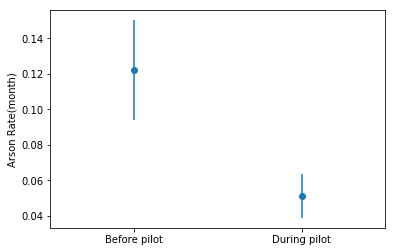

In [23]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(Arson_means)), Arson_means, yerr=Arson_sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Arson Rate(month)")

plt.show()

In [24]:
# t-test
(t_stat, p) = stats.ttest_ind(Arson_Before, Arson_During, equal_var=False)
print(p)
plist.append(p)
if p < 0.05:
    print("The differences in Arson rates are significant.")
else:
    print("The differences in Arson  rates are due to chance.")

0.02132693105543455
The differences in Arson rates are significant.


In [25]:
Autotheft_groupby = pilot_crime_df.loc[pilot_crime_df["ucrDescription"] == "Auto Theft", :]
Autotheft_groupby.head()
Autotheft_groupby.loc[:, ["number", "reportMonth", "reportYear", "Date"]].head()

,number,reportMonth,reportYear,Date
2,3.0,8,2017,before
10,1.0,8,2017,before
18,2.0,8,2017,before
26,1.0,8,2017,before
34,0.0,8,2017,before


In [26]:
before_Autotheft_df = Autotheft_groupby.loc[(Autotheft_groupby["Date"] == "before")]
during_Autotheft_df = Autotheft_groupby.loc[(Autotheft_groupby["Date"] == "during")]
clean_before_Autotheft_df = before_Autotheft_df.dropna()
clean_during_Autotheft_df = during_Autotheft_df.dropna()
Auto_Before = clean_before_Autotheft_df["number"].tolist()
Auto_During = clean_during_Autotheft_df["number"].tolist()

In [27]:
before_Autotheft_means = np.mean(Auto_Before)
before_Autotheft_sem = sem(Auto_Before)
during_Autotheft_means = np.mean(Auto_During)
during_Autotheft_sem = sem(Auto_During)

Auto_means = [before_Autotheft_means, during_Autotheft_means]
Auto_sems = [before_Autotheft_sem, during_Autotheft_sem]
labels = ["Before pilot", "During pilot"]

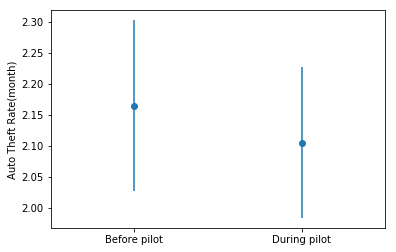

In [28]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(Auto_means)), Auto_means, yerr=Auto_sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Auto Theft Rate(month)")

plt.show()

In [29]:
# t-test
(t_stat, p) = stats.ttest_ind(Auto_Before, Auto_During, equal_var=False)
print(p)
plist.append(p)
if p < 0.05:
    print("The differences in Auto Theft rates are significant.")
else:
    print("The differences in Auto Theft rates are due to chance.")

0.7462852610409809
The differences in Auto Theft rates are due to chance.


In [30]:
Burg_groupby = pilot_crime_df.loc[pilot_crime_df["ucrDescription"] == "Burglary", :]
Burg_groupby.head()
Burg_groupby.loc[:, ["number", "reportMonth", "reportYear", "Date"]].head()

,number,reportMonth,reportYear,Date
3,1.0,8,2017,before
11,3.0,8,2017,before
19,4.0,8,2017,before
27,4.0,8,2017,before
35,0.0,8,2017,before


In [31]:
before_Burg_df = Burg_groupby.loc[(Burg_groupby["Date"] == "before")]
during_Burg_df = Burg_groupby.loc[(Burg_groupby["Date"] == "during")]
clean_before_Burg_df = before_Burg_df.dropna()
clean_during_Burg_df = during_Burg_df.dropna()
Burg_Before = clean_before_Burg_df["number"].tolist()
Burg_During = clean_during_Burg_df["number"].tolist()

In [32]:
before_Burg_means = np.mean(Burg_Before)
before_Burg_sem = sem(Burg_Before)
during_Burg_means = np.mean(Burg_During)
during_Burg_sem = sem(Burg_During)

Burg_means = [before_Burg_means, during_Burg_means]
Burg_sems = [before_Burg_sem, during_Burg_sem]
labels = ["Before pilot", "During pilot"]

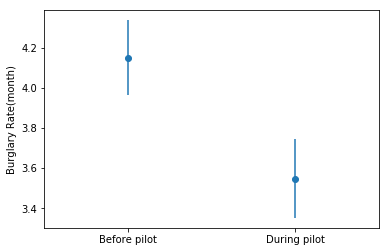

In [33]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(Burg_means)), Burg_means, yerr=Burg_sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Burglary Rate(month)")

plt.show()

In [34]:
# t-test
(t_stat, p) = stats.ttest_ind(Burg_Before, Burg_During, equal_var=False)
print(p)
plist.append(p)
if p < 0.05:
    print("The differences in Burglary rates are significant.")
else:
    print("The differences in Burglary rates are due to chance.")

0.02652803350910897
The differences in Burglary rates are significant.


In [35]:
Hom_groupby = pilot_crime_df.loc[pilot_crime_df["ucrDescription"] == "Homicide", :]
Hom_groupby.head()
Hom_groupby.loc[:, ["number", "reportMonth", "reportYear", "Date"]].head()

,number,reportMonth,reportYear,Date
4,0.0,8,2017,before
12,0.0,8,2017,before
20,0.0,8,2017,before
28,0.0,8,2017,before
36,0.0,8,2017,before


In [36]:
before_Hom_df = Hom_groupby.loc[(Hom_groupby["Date"] == "before")]
during_Hom_df = Hom_groupby.loc[(Hom_groupby["Date"] == "during")]
clean_before_Hom_df = before_Hom_df.dropna()
clean_during_Hom_df = during_Hom_df.dropna()
Hom_Before = clean_before_Hom_df["number"].tolist()
Hom_During = clean_during_Hom_df["number"].tolist()

In [37]:
before_Hom_means = np.mean(Hom_Before)
before_Hom_sem = sem(Hom_Before)
during_Hom_means = np.mean(Hom_During)
during_Hom_sem = sem(Hom_During)

Hom_means = [before_Hom_means, during_Hom_means]
Hom_sems = [before_Hom_sem, during_Hom_sem]
labels = ["Before pilot", "During pilot"]

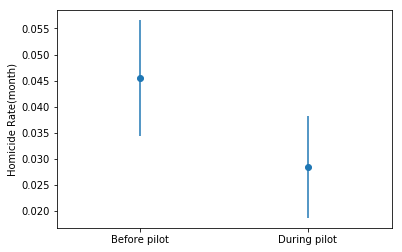

In [38]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(Hom_means)), Hom_means, yerr=Hom_sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Homicide Rate(month)")

plt.show()

In [39]:
# t-test
(t_stat, p) = stats.ttest_ind(Hom_Before, Hom_During, equal_var=False)
print(p)
plist.append(p)
if p < 0.05:
    print("The differences in Homicide rates are significant.")
else:
    print("The differences in Homicide rates are due to chance.")

0.2491858319272128
The differences in Homicide rates are due to chance.


In [40]:
Larc_groupby = pilot_crime_df.loc[pilot_crime_df["ucrDescription"] == "Larceny", :]
Larc_groupby.head()
Larc_groupby.loc[:, ["number", "reportMonth", "reportYear", "Date"]].head()

,number,reportMonth,reportYear,Date
5,8.0,8,2017,before
13,7.0,8,2017,before
21,13.0,8,2017,before
29,5.0,8,2017,before
37,2.0,8,2017,before


In [41]:
before_Larc_df = Larc_groupby.loc[(Larc_groupby["Date"] == "before")]
during_Larc_df = Larc_groupby.loc[(Larc_groupby["Date"] == "during")]
clean_before_Larc_df = before_Larc_df.dropna()
clean_during_Larc_df = during_Larc_df.dropna()
Larc_Before = clean_before_Larc_df["number"].tolist()
Larc_During = clean_during_Larc_df["number"].tolist()

In [42]:
before_Larc_means = np.mean(Larc_Before)
before_Larc_sem = sem(Larc_Before)
during_Larc_means = np.mean(Larc_During)
during_Larc_sem = sem(Larc_During)

Larc_means = [before_Larc_means, during_Larc_means]
Larc_sems = [before_Larc_sem, during_Larc_sem]
labels = ["Before pilot", "During pilot"]

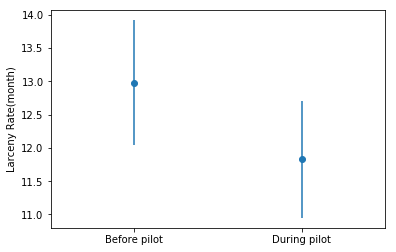

In [43]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(Larc_means)), Larc_means, yerr=Larc_sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Larceny Rate(month)")

plt.show()

In [44]:
# t-test
(t_stat, p) = stats.ttest_ind(Larc_Before, Larc_During, equal_var=False)
print(p)
plist.append(p)
if p < 0.05:
    print("The differences in Larceny rates are significant.")
else:
    print("The differences in Larceny rates are due to chance.")

0.37179338525348327
The differences in Larceny rates are due to chance.


In [45]:
Rape_groupby = pilot_crime_df.loc[pilot_crime_df["ucrDescription"] == "Rape", :]
Rape_groupby.head()
Rape_groupby.loc[:, ["number", "reportMonth", "reportYear", "Date"]].head()

,number,reportMonth,reportYear,Date
6,2.0,8,2017,before
14,0.0,8,2017,before
22,0.0,8,2017,before
30,0.0,8,2017,before
38,0.0,8,2017,before


In [46]:
before_Rape_df = Rape_groupby.loc[(Rape_groupby["Date"] == "before")]
during_Rape_df = Rape_groupby.loc[(Rape_groupby["Date"] == "during")]
clean_before_Rape_df = before_Rape_df.dropna()
clean_during_Rape_df = during_Rape_df.dropna()
Rape_Before = clean_before_Rape_df["number"].tolist()
Rape_During = clean_during_Rape_df["number"].tolist()

In [47]:
before_Rape_means = np.mean(Rape_Before)
before_Rape_sem = sem(Rape_Before)
during_Rape_means = np.mean(Rape_During)
during_Rape_sem = sem(Rape_During)

Rape_means = [before_Rape_means, during_Rape_means]
Rape_sems = [before_Rape_sem, during_Rape_sem]
labels = ["Before pilot", "During pilot"]

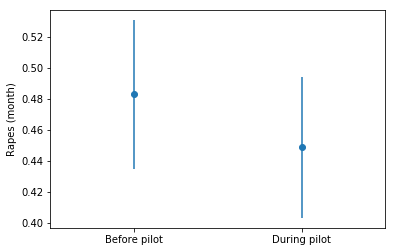

In [48]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(Rape_means)), Rape_means, yerr=Rape_sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Rapes (month)")

plt.show()

In [49]:
# t-test
(t_stat, p) = stats.ttest_ind(Rape_Before, Rape_During, equal_var=False)
print(p)
plist.append(p)
if p < 0.05:
    print("The differences in Rapes are significant.")
else:
    print("The differences in Rapes are due to chance.")

0.6065774242762929
The differences in Rapes are due to chance.


In [50]:
Robb_groupby = pilot_crime_df.loc[pilot_crime_df["ucrDescription"] == "Robbery", :]
Robb_groupby.head()
Robb_groupby.loc[:, ["number", "reportMonth", "reportYear", "Date"]].head()

,number,reportMonth,reportYear,Date
7,1.0,8,2017,before
15,0.0,8,2017,before
23,0.0,8,2017,before
31,0.0,8,2017,before
39,0.0,8,2017,before


In [51]:
before_Robb_df = Robb_groupby.loc[(Robb_groupby["Date"] == "before")]
during_Robb_df = Robb_groupby.loc[(Robb_groupby["Date"] == "during")]
clean_before_Robb_df = before_Robb_df.dropna()
clean_during_Robb_df = during_Robb_df.dropna()
Robb_Before = clean_before_Robb_df["number"].tolist()
Robb_During = clean_during_Robb_df["number"].tolist()

In [52]:
before_Robb_means = np.mean(Robb_Before)
before_Robb_sem = sem(Robb_Before)
during_Robb_means = np.mean(Robb_During)
during_Robb_sem = sem(Robb_During)

Robb_means = [before_Robb_means, during_Robb_means]
Robb_sems = [before_Robb_sem, during_Robb_sem]
labels = ["Before pilot", "During pilot"]

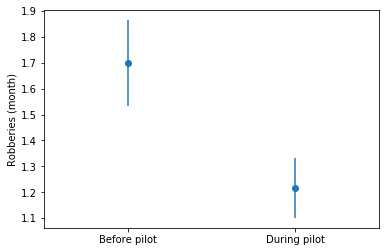

In [53]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(Robb_means)), Robb_means, yerr=Robb_sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Robberies (month)")

plt.show()

In [54]:
# t-test
(t_stat, p) = stats.ttest_ind(Robb_Before, Robb_During, equal_var=False)
print(p)
plist.append(p)
if p < 0.05:
    print("The differences in Robberies are significant.")
else:
    print("The differences in Raobberies are due to chance.")

0.017106073225022122
The differences in Robberies are significant.


In [57]:
Crimes = ["AggAssault", "Arson", "AutoTheft", "Burglary", "Homicide", "Larceny", "Rape", "Robbery"]
StatResult = pd.DataFrame({"Crimes": Crimes})# .sort_values("Pvalue", ascending = True)
StatResult["Pvalue"]=plist
StatResult.sort_values("Pvalue", ascending = True)

,Crimes,Pvalue
7,Robbery,0.017106
1,Arson,0.021327
3,Burglary,0.026528
0,AggAssault,0.031436
4,Homicide,0.249186
5,Larceny,0.371793
6,Rape,0.606577
2,AutoTheft,0.746285


Key Takeaway: Aggravated Assault, Arson, Burglary, and Robbery rates all significantly dropped during the scooter trial period lasting from August 2018 to August 2019 when compared to the same time period the year prior.